<a href="https://colab.research.google.com/github/dandersonghub/EDA_Linear_Regression/blob/main/EDA_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) & Linear Regression

Project Overview

This project demonstrates the process of using EDA to clean a dataset, understand the variables, and analyze the relationships between variables using Simple Linear Regression and Multiple Linear Regression modeling.

##What is EDA?

EDA is a step in the data analysis process, where several techniques are utilized to better understand the dataset being used.

##What is Simple & Multiple Linear Regression?

Simple linear regression uses a single feature to model a linear relationship with a target variable. Multiple linear regression uses uses multiple features to model a linear relationship with a target variable.

## Objectives

*   Explore dataset to determine the main features that have the most impact on systolic blood pressure (BP).
*   Create and evaluate a Simple Linear Regression model
*   Create and evaluate a Multiple Linear Regression model
*   Data source: Population health-related survey dataset 


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>


1. [Import Data](#import)
2. [Descriptive Statistical Analysis](#dsa)
3. [Correlation](#corr)
4. [Simple Linear Regression](#slr)
5. [Multiple Linear Regression](#mlr)
6. [Conclusions](#con)










## Import Data <a name="import"></a>


Import libraries:


In [1]:
# Pandas is a library for data management, manipulation, and analysis 
# Matplotlib is a library for making visualizations
# Seaborn is a higher-level interface to Matplotlib that can be used to simplify graphing
# Numpy is a library for working with arrays of data 

%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

Load the data and store it in dataframe `df`:


In [2]:
# Read in data and limit dataset to only columns of interest
url = "https://raw.githubusercontent.com/dandersonghub/EDA/main/nhanes.csv"
df = pd.read_csv(url)

# Drop all columns except those listed below
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "BMXWT","SMQ020",]
df = df[vars]


# Change column names for clarity
df.rename(columns={'BPXSY1':'BP', 'RIDAGEYR': 'AGE', 'RIAGENDR':'GENDER','RIDRETH1': 'RACE', 
                   'DMDEDUC2':'EDUCATION', 'BMXBMI': 'BMI', 'BMXWT':'WEIGHT', 'SMQ020': 'CIGSMK'}, inplace=True)

df["CIGSMK"] = df.CIGSMK.replace({2: 0, 7: 0, 9: 0})

df

,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
0,128.0,62,1,3,5.0,27.8,94.8,1
1,146.0,53,1,3,3.0,30.8,90.4,1
2,138.0,78,1,3,3.0,28.8,83.4,1
3,132.0,56,2,3,5.0,42.4,109.8,0
4,100.0,42,2,4,4.0,20.3,55.2,0
...,...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,59.1,1
5731,118.0,26,1,3,5.0,33.8,112.1,0
5732,154.0,80,2,3,4.0,31.0,71.7,1
5733,104.0,35,1,3,1.0,26.0,78.2,1


Dataset is limited to 8 columns of data that represents demographic and health-related data for survey respondents. 

## Descriptive Statistical Analysis <a name="dsa"></a> 

In [3]:
# Review list of data types for each column
print(df.dtypes)

BP           float64
AGE            int64
GENDER         int64
RACE           int64
EDUCATION    float64
BMI          float64
WEIGHT       float64
CIGSMK         int64
dtype: object


Handling Missing Values

In [4]:
#Evaluating for Missing Data
#Use function to identify missing values 
missing_data = df.isnull()

# Identify all missings in each column
# "True" indicates missing values 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


BP
False    5401
True      334
Name: BP, dtype: int64

AGE
False    5735
Name: AGE, dtype: int64

GENDER
False    5735
Name: GENDER, dtype: int64

RACE
False    5735
Name: RACE, dtype: int64

EDUCATION
False    5474
True      261
Name: EDUCATION, dtype: int64

BMI
False    5662
True       73
Name: BMI, dtype: int64

WEIGHT
False    5666
True       69
Name: WEIGHT, dtype: int64

CIGSMK
False    5735
Name: CIGSMK, dtype: int64



**Dataset Missing Values Summary**

Based on the summary above, this dataset contains 5,735 rows and 8 columns of data, 4 columns contain missing data.

<ol>
    <li>"BP": 334 missing data</li>
    <li>"EDUCATION": 261 missing data</li>
    <li>"BMI": 73 missing data</li>
    <li>"WEIGHT": 69 missing data</li>
</ol>

<h3 id="deal_missing_values">Example ways to deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Drop data

In [5]:
# Drop all rows that do not have a value for the column "WEIGHT"
# 69 Rows will be dropped from "WEIGHT", leaving 5,666 rows of data 
df.dropna(subset=["WEIGHT"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)


In [6]:
# Review summary statistics for columns in dataset
df.describe()

,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
count,5351.00000,5666.000000,5666.000000,5666.000000,5410.000000,5662.000000,5666.000000,5666.000000
mean,125.02635,47.992058,1.520120,3.044299,3.444917,29.382197,81.342676,0.403636
std,18.39327,18.393572,0.499639,1.296331,1.308849,7.095921,21.764409,0.490669
min,82.00000,18.000000,1.000000,1.000000,1.000000,14.500000,32.400000,0.000000
25%,112.00000,32.000000,1.000000,2.000000,3.000000,24.300000,65.900000,0.000000
50%,122.00000,48.000000,2.000000,3.000000,4.000000,28.300000,78.200000,0.000000
75%,134.00000,63.000000,2.000000,4.000000,5.000000,33.000000,92.700000,1.000000
max,236.00000,80.000000,2.000000,5.000000,9.000000,67.300000,198.900000,1.000000


Replace Data

In [7]:
# Impute missing values for the outcome column "BP"
# Replace missings in the column "BP" with the mean
# Calculate the mean value for the "BP" column
avg_BP = df["BP"].mean(axis=0)
print("Average BP:", avg_BP)

Average BP: 125.0263502149131


In [8]:
# Replace Missings or "NaN" with mean value in "BP" column
df["BP"].replace(np.nan, avg_BP, inplace=True)

In [9]:
# Display summary statistics
df["BP"].describe()

count    5666.000000
mean      125.026350
std        17.874582
min        82.000000
25%       114.000000
50%       124.000000
75%       134.000000
max       236.000000
Name: BP, dtype: float64

In [10]:
# Impute missing "BMI" values 
# Replace missings in the column "BMI" with the mean
# Calculate the mean value for the "BMI" column
avg_BMI = df["BMI"].mean(axis=0)
print("Average BMI:", avg_BMI)

Average BMI: 29.382197103497


In [11]:
# Replace missings or "NaN" with mean value in "BP" column
df["BMI"].replace(np.nan, avg_BMI, inplace=True)
df["BMI"].describe()

count    5666.000000
mean       29.382197
std         7.093415
min        14.500000
25%        24.300000
50%        28.300000
75%        33.000000
max        67.300000
Name: BMI, dtype: float64

In [12]:
# Replace missings in "EDUCATION" column with most frequent value (4)
df['EDUCATION'].value_counts().idxmax()

4.0

In [13]:
df["EDUCATION"].replace(np.nan, 4, inplace=True)
df["EDUCATION"].describe()

count    5666.000000
mean        3.469996
std         1.284121
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         9.000000
Name: EDUCATION, dtype: float64

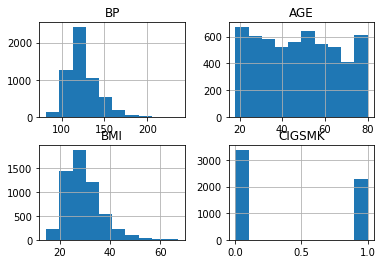

In [14]:
#Plot histograms of variables
viz = df[['BP','AGE','BMI','CIGSMK']]
viz.hist()
plt.show()

####Categorical Variables

Plot categorical variables using boxplots to visualize distributions

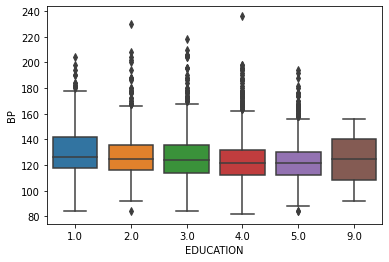

In [15]:
sns.boxplot(x="EDUCATION", y="BP", data=df)

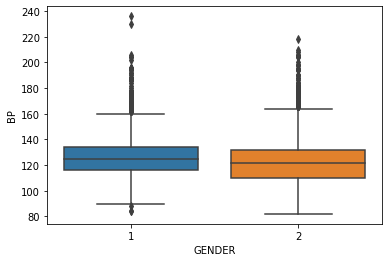

In [16]:
sns.boxplot(x="GENDER", y="BP", data=df)

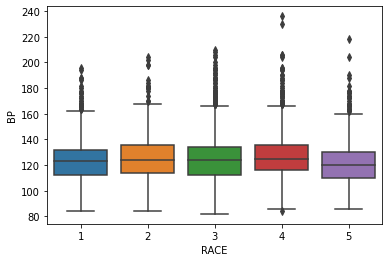

In [17]:
sns.boxplot(x="RACE", y="BP", data=df)

The categories for "EDUCATION", "GENDER", and "RACE" all have significant overlap so they would not be the best predictors of "BP". However, they still may be of interest to model.

## Correlation <a name="corr"></a>



In [18]:
# Calculate the correlation between all variables 
pd.set_option('display.max_columns', None)
df.corr()

,BP,AGE,GENDER,RACE,EDUCATION,BMI,WEIGHT,CIGSMK
BP,1.000000,0.458908,-0.096589,-0.009634,-0.151923,0.129613,0.117792,0.109822
AGE,0.458908,1.000000,-0.011286,-0.043531,-0.161009,0.059580,-0.010378,0.180258
GENDER,-0.096589,-0.011286,1.000000,-0.027949,0.022539,0.081783,-0.230864,-0.210621
RACE,-0.009634,-0.043531,-0.027949,1.000000,0.296709,-0.155914,-0.065482,-0.014795
EDUCATION,-0.151923,-0.161009,0.022539,0.296709,1.000000,-0.060686,0.035447,-0.106147
BMI,0.129613,0.059580,0.081783,-0.155914,-0.060686,1.000000,0.883874,0.024182
WEIGHT,0.117792,-0.010378,-0.230864,-0.065482,0.035447,0.883874,1.000000,0.105539
CIGSMK,0.109822,0.180258,-0.210621,-0.014795,-0.106147,0.024182,0.105539,1.000000


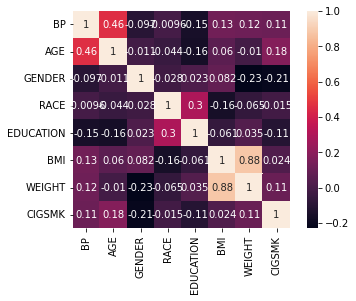

In [19]:
# Create Heatmap to visualize correlation between variables
# Specifically, we can visualize how Systolic Blood Pressure"BP" is related to the other variables
import matplotlib.pyplot as plt
%matplotlib inline 
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

Based on a review of the correlations above, we would like to further investigate the correlations between "AGE", and "BP". The "AGE" variable has the strongest with correlation "BP". 

####Correlation & P-value

In [20]:
# Calculate Pearson Correlation Coefficient and P-value between 'AGE' and 'BP'
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['AGE'], df['BP'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.45890793045524114  with a P-value of P = 3.2678897669619706e-293


Since the p-value is < 0.001, the correlation between "AGE" and "BP" is statistically significant, with a moderate linear relationship (~0.46).

## Simple Linear Regression <a name="slr"></a>

Simple linear regression model with only one covariate, AGE, predicting systolic blood pressure (BP). 

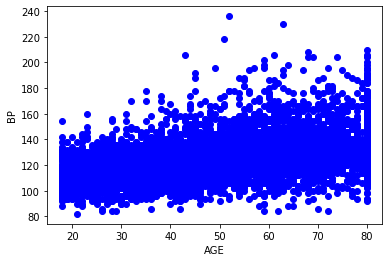

In [21]:
# Plot AGE vs BP to see how linear their relationship is
plt.scatter(df.AGE, df.BP,  color='blue')
plt.xlabel("AGE")
plt.ylabel("BP")
plt.show()

Based on this scatter plot, as age increases, so does blood pressure.

In [22]:
# Create train and test dataset  80% train, 20% test
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test  = df[~msk]

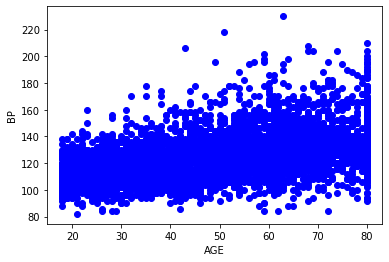

In [23]:
# Training data distribution
plt.scatter(train.AGE, train.BP,  color='blue')
plt.xlabel("AGE")
plt.ylabel("BP")
plt.show()

In [24]:
# Simple Linear Regression Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AGE']])
train_y = np.asanyarray(train[['BP']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.45289861]]
Intercept:  [103.27107345]


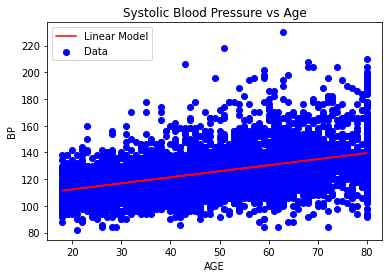

In [25]:
# Plot the fit line over data
plt.scatter(train.AGE, train.BP,  color='blue', label='Data')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label='Linear Model')
plt.xlabel("AGE")
plt.ylabel("BP")
plt.title('Systolic Blood Pressure vs Age')
plt.legend()
plt.show()

This fitted model implies that when comparing two people whose ages differ by one year, the older person will on average have 0.45 units higher BP than the younger person. There is strong evidence that there is a real association between systolic blood pressure and age in this population.

R-Squared & Error Evaluation

In [26]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['AGE']])
test_y = np.asanyarray(test[['BP']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 11.87
Residual sum of squares (MSE): 251.97
R2-score: 0.19


The primary summary statistic for assessing the strength of a predictive relationship in a regression model is the R-squared, which is shown to be 0.19 in the regression output above. This means that 19% of the variation in BP is explained by age.

## Multiple Linear Regression <a name="mlr"></a>

Multiple linear regression model with covariates, age (AGE), CIGSMK (smoking status) and Body Mass Index (BMI), predicting blood pressure (BP).

In [27]:
# Smoking status added to model
# Model includes Age and Smoking status
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AGE','CIGSMK']])
y = np.asanyarray(train[['BP']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.44563922 1.49299463]]


In [28]:
# BMI added to model
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['AGE','CIGSMK', 'BMI']])
y = np.asanyarray(train[['BP']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[0.4403961  1.47948739 0.24809403]]


In [29]:
# R2 and error calculated
y_hat= regr.predict(test[['AGE','CIGSMK','BMI']])
x = np.asanyarray(test[['AGE','CIGSMK','BMI']])
y = np.asanyarray(test[['BP']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 249.10
Variance score: 0.20


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Evaluation



The model above uses AGE, CIGSMK (smoking status), and BMI to explain the variation in blood pressure (BP). It finds that given two subjects with the same age, smoking status, and, whose BMI differs by one unit, the person with greater BMI will have about 0.25 units greater systolic blood pressure (BP). After we added BMI to the model, the coefficients for age and smoking status did not change by much. After modeling, 20% of the variation in BP can be explained by age, smoking status, and, BMI. 

## Conclusions <a name="con"></a>

**EDA**

Performing Exploratory Data Analysis (EDA) on this dataset has given us a better idea of what our data looks like and which variables are important to take into account when predicting Blood Pressure (BP). 

**Simple Linear Regression**

Based on this analysis, the variable for age has been shown to significantly affect systolic blood pressure (BP). Ninteen percent of the variation in systolic BP is explained by age.

**Multiple Linear Regression**

Variables for age, smoking status, and, BMI were modeled to explain the variation in blood pressure. 
After controlling for BMI, the age and smoking status effects on blood pressure decreased. After modeling, 20% of the variation in BP can be explained by age, smoking status, and, BMI. 